# Predicting Daily Close Stock Prices

The aim of this investigate using machine learning in trading equities, specifically to predict stock close prices for a 7-day period. 

### Description of Dataset
The primary dataset used is daily stock data for stocks on the National Stock Exchange(NSE). The date range for stock data varies depending on when the stock went public. The furthest date was in the year 1998. The most recent date in the dataset was 15 June 2018. The data was taken from Quandl's free access database.

All the data is in one comma-separated value file (CSV), with each row being one datapoint. There are over 14 million datapoints in the dataset.

Each row has 8 columns. That means we have 8 features for each stock on every trading day since the year when the stock was tradable (from 1998 onwards).

The Dataset is like this,<br>

**Date** :	YYYY-MM-DD	<br>
**Open** :	given to 2 decimal places. Price of stock when the market opened on that day in Rupees.<br>
**High** :	2 d.p.	Maximum price of the stock during the trading day in Rupees.<br>
**Low**  :	2 d.p.	Minimum price of the stock during the trading day in in Rupees.<br>
**Last** :  2 d.p.  Price just before closing on any given day in Rupees.<br>
**Close** :	2 d.p.	Price of stock when the market closed on that day in Rupees.<br>
**Volume** : 1 d.p.	The number of shares of that stock traded on that day.<br>
**Turnover (Lacs)** : Total equity trading on that day in Rupees.<br>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [63]:
#Loading the data

df=pd.read_csv('data/NSE-RELIANCE.csv')

df['volume']=df['Total Trade Quantity']
df=df.drop(['Total Trade Quantity'], axis=1)

df.head()

,Date,Open,High,Low,Last,Close,Turnover (Lacs),volume
0,15-06-18,1006.00,1023.50,999.25,1012.45,1014.20,114695.23,11294702.0
1,14-06-18,997.45,1011.80,987.40,1007.00,1007.95,54915.74,5484867.0
2,13-06-18,1000.00,1005.90,989.50,1002.50,1002.50,59215.58,5926020.0
3,12-06-18,983.40,1000.00,980.30,999.40,997.15,73792.66,7445221.0
4,11-06-18,987.10,999.95,979.05,980.05,982.65,68060.07,6866053.0


In [36]:
df.tail()

,Date,Open,High,Low,Last,Close,Turnover (Lacs),volume
5043,26-03-98,183.85,184.25,178.75,179.25,179.45,12542.00,6915150.0
5044,25-03-98,181.50,184.60,179.00,183.50,183.85,16292.18,8936250.0
5045,24-03-98,184.00,184.90,177.50,178.00,178.70,15951.78,8838650.0
5046,23-03-98,178.50,181.00,178.50,180.20,180.20,3165.37,1758700.0
5047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#Shape of the dataframe
df.shape

(5048, 8)

In [38]:
df.dtypes

Date                object
Open               float64
High               float64
Low                float64
Last               float64
Close              float64
Turnover (Lacs)    float64
volume             float64
dtype: object

In [39]:
#Removing the null values in the dataset
df=df.dropna(axis=0)

df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Last               0
Close              0
Turnover (Lacs)    0
volume             0
dtype: int64

In [40]:
df.describe()

,Open,High,Low,Last,Close,Turnover (Lacs),volume
count,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5.047000e+03
mean,866.016059,878.572885,852.188458,864.709194,864.924500,37720.575106,4.848193e+06
std,576.481071,586.487756,564.074242,574.882056,575.104874,32050.422091,3.379928e+06
min,102.600000,105.600000,99.600000,101.600000,101.300000,429.550000,5.282000e+04
25%,362.950000,370.675000,357.200000,362.225000,363.300000,17632.155000,2.753406e+06
50%,849.700000,858.800000,839.200000,847.500000,847.900000,30075.620000,4.017792e+06
75%,1035.525000,1048.600000,1022.675000,1035.000000,1035.050000,48382.935000,5.928272e+06
max,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,457043.420000,6.100024e+07


In [41]:
#Looking for some relevant insights to the dataset

df['daily_variation']=df['High']-df['Low']

df['percentage_variation']=(df['daily_variation']/df['Open'])*100

df=df.drop(['Turnover (Lacs)'],axis=1)
df.head()

,Date,Open,High,Low,Last,Close,volume,daily_variation,percentage_variation
0,15-06-18,1006.00,1023.50,999.25,1012.45,1014.20,11294702.0,24.25,2.410537
1,14-06-18,997.45,1011.80,987.40,1007.00,1007.95,5484867.0,24.40,2.446238
2,13-06-18,1000.00,1005.90,989.50,1002.50,1002.50,5926020.0,16.40,1.640000
3,12-06-18,983.40,1000.00,980.30,999.40,997.15,7445221.0,19.70,2.003254
4,11-06-18,987.10,999.95,979.05,980.05,982.65,6866053.0,20.90,2.117313


In [42]:
#New shape of the dataframe
df.shape

(5047, 9)

C:\Users\naman\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


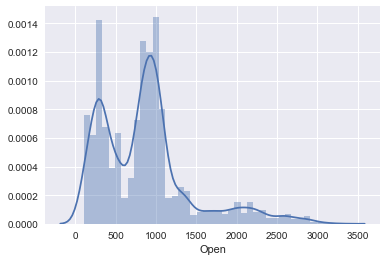

In [43]:
#variation of the Opening Points of Market
sns.distplot(df['Open'])

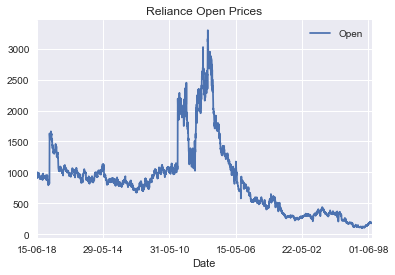

In [44]:
df.plot(x='Date', y='Open', title='Reliance Open Prices')

In [64]:
#idx=df.index.values
#df = df.iloc[::-1]
#df.index=idx

In [84]:
def prepare_train_test(days, periods, target='Close', test_size=0.2, buffer=0, target_days=7):  
   
    """
    `days`: number of days prior to consider.
    `periods`: the total number of datapoints used in each cycle (training + test)
    `target_days` : number of days to predict.
    """
    # Columns
    columns = []
    for j in range(1,days+1):
        columns.append('i-%s' % str(j))
    columns.append('High')
    columns.append('Low')

    # Columns: Prices (predict multiple day)
    targetday_columns = []
    for j in range(1,target_days+1):
        targetday_columns.append('Day %s' % str(j-1))

    # Index
    start_date = df.iloc[days+buffer]["Date"]    
    index = pd.date_range(start_date, periods=periods, freq='D')
    
    # Create empty dataframes for features and prices
    features = pd.DataFrame(index=index, columns=columns)
    
    #prices = pd.DataFrame(index=index, columns=["Target"])
    
    targetday_prices = pd.DataFrame(index=index, columns=targetday_columns)

    # Prepare test and training sets
    for i in range(periods):
        # Fill in Target df
        for j in range(target_days):
            targetday_prices.iloc[i]['Day %s' % str(j)] = df.iloc[buffer+i+days+j][target]
            #print(buffer+i+days+j)
        # Fill in Features df
        for j in range(days):
            features.iloc[i]['i-%s' % str(days-j)] = df.iloc[buffer+i+j][target]
        features.iloc[i]['High'] = max(df[buffer+i:buffer+i+days]['High'])
        features.iloc[i]['Low'] = min(df[buffer+i:buffer+i+days]['Low'])
                
    X = features
    y = targetday_prices
    print("X.tail: ", X.tail())

   
    
    # Train-test split of time series data
    if len(X) != len(y):
        return "Error"
    split_index = int(len(X) * (1-test_size))
    X_train = X[:split_index]
    X_test = X[split_index:]
    y_train = y[:split_index]
    y_test = y[split_index:]
    
    return X_train, X_test, y_train, y_test

In [85]:
#a,b,c,d=prepare_train_test(days=7,periods=500)
X_train = []
X_test = []
y_train = []
y_test = []

In [86]:
from sklearn.multioutput import MultiOutputRegressor

# Import metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [87]:
# Helper functions for metrics
def rmsp(test, pred):
    return np.sqrt(np.mean(((test - pred)/test)**2)) * 100

def print_metrics(test, pred):
    print("Root Mean Squared Percentage Error \n", rmsp(test, pred))
   
    print("Explained Variance Score: ", explained_variance_score(test, pred))
    
    print("R2 score: ", r2_score(test, pred))

In [88]:
from sklearn import svm
from sklearn.linear_model import LinearRegression

In [89]:
def predict_and_metrics(clf=LinearRegression(), target_days=7, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, days=7):

    # Classify and predict
    clf = MultiOutputRegressor(clf)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

#     print("X_train.head(): ", X_train.head())
#     print("X_train.tail(): ", X_train.tail())
#     print("Pred: ", pred[:5])
#     print("Test: ", y_test[:5])
    
    # Print metrics
    print("# Days used to predict: %s" % str(days))
    print("\n%s-day predictions" % str(target_days)) 
    print_metrics(y_test, pred)
    return rmsp(y_test, pred)

In [95]:
def execute(steps=8, buffer_step=500, days=7, periods=1000, model=LinearRegression(), predict_days=7):
    """
    `steps`: number of train-test cycles.
    `periods`: the total number of datapoints used in each cycle (training + test)
    `buffer_step`: number of datapoints between the starting points of each consecutive train-test cycle
    """
    errors=[]
    r2=[]
    for segment in range(steps):
        buffer = segment*buffer_step
        print("Buffer: ", buffer)
        print("\n")
        X_train, X_test, y_train, y_test = prepare_train_test(days=days, periods=periods, buffer=buffer)
        errors.append(predict_and_metrics(clf=model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, days=days))
    print("Errors: ", errors)
    
    #For each cycle day-wise errors
    daily_error = []
    for day in range(predict_days):
        daily_error.append([])
    for segment in range(steps):
        for day in range(predict_days):
            daily_error[day].append(errors[segment][day])
    print("Daily error: ", daily_error)
    
    #Average day wise errors
    average_daily_error = []
    for day in daily_error:
        average_daily_error.append(np.mean(day))
    print("Mean daily error: ", average_daily_error)

In [96]:
#Linear regression
execute(steps=5)

Buffer:  0


X.tail:                  i-1      i-2      i-3      i-4      i-5      i-6     i-7  \
2021-02-25   1088.9  1073.55   1064.7   1082.2   1095.4   1077.5  1089.9   
2021-02-26  1087.95   1088.9  1073.55   1064.7   1082.2   1095.4  1077.5   
2021-02-27   1101.7  1087.95   1088.9  1073.55   1064.7   1082.2  1095.4   
2021-02-28  1127.45   1101.7  1087.95   1088.9  1073.55   1064.7  1082.2   
2021-03-01   1100.8  1127.45   1101.7  1087.95   1088.9  1073.55  1064.7   

              High   Low  
2021-02-25  1106.6  1060  
2021-02-26    1108  1060  
2021-02-27    1140  1060  
2021-02-28    1140  1060  
2021-03-01    1140  1060  
# Days used to predict: 7

7-day predictions
Root Mean Squared Percentage Error 
 Day 0    1.441902
Day 1    2.131260
Day 2    2.562767
Day 3    2.894938
Day 4    3.185944
Day 5    3.420646
Day 6    3.565463
dtype: float64
Explained Variance Score:  0.853236643031
R2 score:  0.853085543235
Buffer:  500




C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


X.tail:                 i-1     i-2     i-3     i-4     i-5     i-6     i-7    High  \
2018-09-27   695.3   691.2  701.65  701.85  706.25   705.6  685.25  729.05   
2018-09-28  686.85   695.3   691.2  701.65  701.85  706.25   705.6  729.05   
2018-09-29   691.1  686.85   695.3   691.2  701.65  701.85  706.25   709.8   
2018-09-30   695.5   691.1  686.85   695.3   691.2  701.65  701.85   709.8   
2018-10-01  688.55   695.5   691.1  686.85   695.3   691.2  701.65   704.6   

               Low  
2018-09-27  678.05  
2018-09-28  679.55  
2018-09-29  679.55  
2018-09-30  679.55  
2018-10-01     675  
# Days used to predict: 7

7-day predictions
Root Mean Squared Percentage Error 
 Day 0    1.994451
Day 1    2.555318
Day 2    2.898523
Day 3    3.234928
Day 4    3.583263
Day 5    3.930301
Day 6    4.281641
dtype: float64
Explained Variance Score:  0.846745542553
R2 score:  0.816781512375
Buffer:  1000




C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


X.tail:                  i-1      i-2      i-3      i-4      i-5      i-6      i-7  \
2017-02-08  1036.65   1045.6  1010.55  1011.05   1030.8   1031.2  1007.75   
2017-02-09  1022.25  1036.65   1045.6  1010.55  1011.05   1030.8   1031.2   
2017-02-10  1008.05  1022.25  1036.65   1045.6  1010.55  1011.05   1030.8   
2017-02-11   985.65  1008.05  1022.25  1036.65   1045.6  1010.55  1011.05   
2017-02-12  1022.65   985.65  1008.05  1022.25  1036.65   1045.6  1010.55   

               High     Low  
2017-02-08   1048.5    1000  
2017-02-09   1048.5  1001.6  
2017-02-10   1048.5     991  
2017-02-11   1048.5  982.75  
2017-02-12  1048.95  982.75  
# Days used to predict: 7

7-day predictions
Root Mean Squared Percentage Error 
 Day 0    1.516832
Day 1    2.139946
Day 2    2.699183
Day 3    3.171373
Day 4    3.587376
Day 5    4.007096
Day 6    4.430747
dtype: float64
Explained Variance Score:  0.679361921637
R2 score:  0.551886638055
Buffer:  1500


C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)




X.tail:                  i-1      i-2      i-3      i-4      i-5      i-6      i-7  \
2015-02-05  2553.85   2501.1  2530.75  2622.95   2635.7  2602.95   2667.7   
2015-02-06   2528.4  2553.85   2501.1  2530.75  2622.95   2635.7  2602.95   
2015-02-07  2667.25   2528.4  2553.85   2501.1  2530.75  2622.95   2635.7   
2015-02-08  2688.95  2667.25   2528.4  2553.85   2501.1  2530.75  2622.95   
2015-02-09     2650  2688.95  2667.25   2528.4  2553.85   2501.1  2530.75   

               High     Low  
2015-02-05     2675  2477.1  
2015-02-06  2673.65  2477.1  
2015-02-07     2686  2477.1  
2015-02-08     2700  2477.1  
2015-02-09     2700  2477.1  
# Days used to predict: 7

7-day predictions
Root Mean Squared Percentage Error 
 Day 0    4.013252
Day 1    5.962352
Day 2    7.182973
Day 3    8.179533
Day 4    8.759542
Day 5    9.237054
Day 6    9.545304
dtype: float64
Explained Variance Score:  0.946274147472
R2 score:  0.940244464493
Buffer:  2000




C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


X.tail:                  i-1      i-2      i-3      i-4      i-5      i-6     i-7  \
2013-02-08  1066.85  1021.65   1043.7   1086.2   1004.8    978.1   929.4   
2013-02-09  1110.25  1066.85  1021.65   1043.7   1086.2   1004.8   978.1   
2013-02-10   1169.8  1110.25  1066.85  1021.65   1043.7   1086.2  1004.8   
2013-02-11   1154.1   1169.8  1110.25  1066.85  1021.65   1043.7  1086.2   
2013-02-12     1155   1154.1   1169.8  1110.25  1066.85  1021.65  1043.7   

               High    Low  
2013-02-08  1120.55    840  
2013-02-09   1184.4  961.5  
2013-02-10   1184.4    976  
2013-02-11   1184.4    976  
2013-02-12   1184.4    976  
# Days used to predict: 7

7-day predictions
Root Mean Squared Percentage Error 
 Day 0    2.199480
Day 1    3.172370
Day 2    3.984362
Day 3    4.699736
Day 4    5.397183
Day 5    6.195389
Day 6    7.005018
dtype: float64
Explained Variance Score:  0.914210565445
R2 score:  0.871750864497
Errors:  [Day 0    1.441902
Day 1    2.131260
Day 2    2.562767
Day 3

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


In [97]:
#Linear regression - considering 15 days of prior data
execute(steps=8, days=15)

Buffer:  0


X.tail:                  i-1      i-2      i-3      i-4      i-5      i-6      i-7  \
2021-02-13  1079.25  1120.05  1079.85   1078.4   1100.8  1127.45   1101.7   
2021-02-14   1053.4  1079.25  1120.05  1079.85   1078.4   1100.8  1127.45   
2021-02-15   1045.5   1053.4  1079.25  1120.05  1079.85   1078.4   1100.8   
2021-02-16   1063.4   1045.5   1053.4  1079.25  1120.05  1079.85   1078.4   
2021-02-17   1028.7   1063.4   1045.5   1053.4  1079.25  1120.05  1079.85   

                i-8      i-9     i-10     i-11     i-12     i-13     i-14  \
2021-02-13  1087.95   1088.9  1073.55   1064.7   1082.2   1095.4   1077.5   
2021-02-14   1101.7  1087.95   1088.9  1073.55   1064.7   1082.2   1095.4   
2021-02-15  1127.45   1101.7  1087.95   1088.9  1073.55   1064.7   1082.2   
2021-02-16   1100.8  1127.45   1101.7  1087.95   1088.9  1073.55   1064.7   
2021-02-17   1078.4   1100.8  1127.45   1101.7  1087.95   1088.9  1073.55   

              i-15     High      Low  
2021-02-13  1

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


X.tail:                 i-1     i-2     i-3     i-4     i-5     i-6     i-7     i-8  \
2019-02-09   681.3  681.65   676.1  685.15  688.55   695.5   691.1  686.85   
2019-02-10   697.2   681.3  681.65   676.1  685.15  688.55   695.5   691.1   
2019-02-11  694.15   697.2   681.3  681.65   676.1  685.15  688.55   695.5   
2019-02-12   695.1  694.15   697.2   681.3  681.65   676.1  685.15  688.55   
2019-02-13  708.35   695.1  694.15   697.2   681.3  681.65   676.1  685.15   

               i-9    i-10    i-11    i-12    i-13    i-14    i-15    High  \
2019-02-09   695.3   691.2  701.65  701.85  706.25   705.6  685.25  729.05   
2019-02-10  686.85   695.3   691.2  701.65  701.85  706.25   705.6  729.05   
2019-02-11   691.1  686.85   695.3   691.2  701.65  701.85  706.25   709.8   
2019-02-12   695.5   691.1  686.85   695.3   691.2  701.65  701.85   709.8   
2019-02-13  688.55   695.5   691.1  686.85   695.3   691.2  701.65   718.9   

               Low  
2019-02-09  673.05  
2019-02-10 

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


X.tail:                  i-1      i-2      i-3      i-4      i-5      i-6      i-7  \
2017-04-26   1020.6   998.65   999.95   995.55  1022.65   985.65  1008.05   
2017-04-27  1016.55   1020.6   998.65   999.95   995.55  1022.65   985.65   
2017-04-28  1043.65  1016.55   1020.6   998.65   999.95   995.55  1022.65   
2017-04-29   1071.8  1043.65  1016.55   1020.6   998.65   999.95   995.55   
2017-04-30  1082.95   1071.8  1043.65  1016.55   1020.6   998.65   999.95   

                i-8      i-9     i-10     i-11     i-12     i-13     i-14  \
2017-04-26  1022.25  1036.65   1045.6  1010.55  1011.05   1030.8   1031.2   
2017-04-27  1008.05  1022.25  1036.65   1045.6  1010.55  1011.05   1030.8   
2017-04-28   985.65  1008.05  1022.25  1036.65   1045.6  1010.55  1011.05   
2017-04-29  1022.65   985.65  1008.05  1022.25  1036.65   1045.6  1010.55   
2017-04-30   995.55  1022.65   985.65  1008.05  1022.25  1036.65   1045.6   

               i-15     High    Low  
2017-04-26  1007.75  1048.9

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


X.tail:                  i-1      i-2      i-3      i-4      i-5      i-6      i-7  \
2014-12-26  2659.95   2614.5  2674.75   2669.2     2650  2688.95  2667.25   
2014-12-27   2591.4  2659.95   2614.5  2674.75   2669.2     2650  2688.95   
2014-12-28   2624.5   2591.4  2659.95   2614.5  2674.75   2669.2     2650   
2014-12-29  2582.65   2624.5   2591.4  2659.95   2614.5  2674.75   2669.2   
2014-12-30   2577.6  2582.65   2624.5   2591.4  2659.95   2614.5  2674.75   

                i-8      i-9     i-10     i-11     i-12     i-13     i-14  \
2014-12-26   2528.4  2553.85   2501.1  2530.75  2622.95   2635.7  2602.95   
2014-12-27  2667.25   2528.4  2553.85   2501.1  2530.75  2622.95   2635.7   
2014-12-28  2688.95  2667.25   2528.4  2553.85   2501.1  2530.75  2622.95   
2014-12-29     2650  2688.95  2667.25   2528.4  2553.85   2501.1  2530.75   
2014-12-30   2669.2     2650  2688.95  2667.25   2528.4  2553.85   2501.1   

               i-15  High     Low  
2014-12-26   2667.7  3026  24

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)




X.tail:                  i-1      i-2      i-3      i-4      i-5      i-6      i-7  \
2013-06-26  1031.15  1035.55   1080.2  1099.25     1155   1154.1   1169.8   
2013-06-27  1022.95  1031.15  1035.55   1080.2  1099.25     1155   1154.1   
2013-06-28   1008.9  1022.95  1031.15  1035.55   1080.2  1099.25     1155   
2013-06-29   997.95   1008.9  1022.95  1031.15  1035.55   1080.2  1099.25   
2013-06-30   978.65   997.95   1008.9  1022.95  1031.15  1035.55   1080.2   

                i-8      i-9     i-10     i-11     i-12     i-13     i-14  \
2013-06-26  1110.25  1066.85  1021.65   1043.7   1086.2   1004.8    978.1   
2013-06-27   1169.8  1110.25  1066.85  1021.65   1043.7   1086.2   1004.8   
2013-06-28   1154.1   1169.8  1110.25  1066.85  1021.65   1043.7   1086.2   
2013-06-29     1155   1154.1   1169.8  1110.25  1066.85  1021.65   1043.7   
2013-06-30  1099.25     1155   1154.1   1169.8  1110.25  1066.85  1021.65   

              i-15    High     Low  
2013-06-26   929.4  1184.4

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


X.tail:                 i-1     i-2     i-3     i-4     i-5     i-6     i-7     i-8  \
2011-01-11     530   540.5   532.4   519.2  490.25  496.65  511.45   477.1   
2011-01-12  530.75     530   540.5   532.4   519.2  490.25  496.65  511.45   
2011-01-13  528.45  530.75     530   540.5   532.4   519.2  490.25  496.65   
2011-01-14  526.45  528.45  530.75     530   540.5   532.4   519.2  490.25   
2011-01-15   529.3  526.45  528.45  530.75     530   540.5   532.4   519.2   

               i-9    i-10    i-11    i-12    i-13    i-14    i-15    High  \
2011-01-11   404.3   433.7  452.45   443.2   439.5  453.85   455.7   543.3   
2011-01-12   477.1   404.3   433.7  452.45   443.2   439.5  453.85  633.05   
2011-01-13  511.45   477.1   404.3   433.7  452.45   443.2   439.5  633.05   
2011-01-14  496.65  511.45   477.1   404.3   433.7  452.45   443.2  633.05   
2011-01-15  490.25  496.65  511.45   477.1   404.3   433.7  452.45  633.05   

              Low  
2011-01-11  381.7  
2011-01-12  3

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


X.tail:                 i-1     i-2     i-3     i-4     i-5     i-6    i-7    i-8  \
2009-01-13  291.45  288.05     286   283.7   282.9   277.9  280.8  276.2   
2009-01-14  289.95  291.45  288.05     286   283.7   282.9  277.9  280.8   
2009-01-15  293.15  289.95  291.45  288.05     286   283.7  282.9  277.9   
2009-01-16   289.7  293.15  289.95  291.45  288.05     286  283.7  282.9   
2009-01-17  287.85   289.7  293.15  289.95  291.45  288.05    286  283.7   

               i-9    i-10    i-11    i-12    i-13    i-14    i-15    High  \
2009-01-13  262.25  258.75  254.05   270.6  269.35     260   265.3  294.75   
2009-01-14   276.2  262.25  258.75  254.05   270.6  269.35     260   295.4   
2009-01-15   280.8   276.2  262.25  258.75  254.05   270.6  269.35   295.4   
2009-01-16   277.9   280.8   276.2  262.25  258.75  254.05   270.6   295.4   
2009-01-17   282.9   277.9   280.8   276.2  262.25  258.75  254.05   295.4   

              Low  
2009-01-13  248.6  
2009-01-14  248.6  
2009-

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


X.tail:                 i-1     i-2     i-3     i-4     i-5     i-6     i-7     i-8  \
2007-01-17  316.75   315.9   319.5   317.4  318.85   310.1   315.6  312.45   
2007-01-18  325.25  316.75   315.9   319.5   317.4  318.85   310.1   315.6   
2007-01-19  328.35  325.25  316.75   315.9   319.5   317.4  318.85   310.1   
2007-01-20     324  328.35  325.25  316.75   315.9   319.5   317.4  318.85   
2007-01-21  335.35     324  328.35  325.25  316.75   315.9   319.5   317.4   

               i-9    i-10    i-11    i-12    i-13    i-14    i-15    High  \
2007-01-17  314.75  312.75   312.8  316.45  339.45   343.8   343.9   356.8   
2007-01-18  312.45  314.75  312.75   312.8  316.45  339.45   343.8  347.45   
2007-01-19   315.6  312.45  314.75  312.75   312.8  316.45  339.45  347.45   
2007-01-20   310.1   315.6  312.45  314.75  312.75   312.8  316.45     337   
2007-01-21  318.85   310.1   315.6  312.45  314.75  312.75   312.8  341.55   

              Low  
2007-01-17  306.5  
2007-01-18  3

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


In [99]:
#Linear regression - considering 25 days of prior data
execute(steps=8, days=25)

Buffer:  0


X.tail:                 i-1     i-2     i-3     i-4     i-5     i-6     i-7     i-8  \
2021-07-27   928.1  946.85  963.35  960.85   960.3   997.6  1028.7  1063.4   
2021-07-28   935.8   928.1  946.85  963.35  960.85   960.3   997.6  1028.7   
2021-07-29   940.3   935.8   928.1  946.85  963.35  960.85   960.3   997.6   
2021-07-30     945   940.3   935.8   928.1  946.85  963.35  960.85   960.3   
2021-07-31  948.25     945   940.3   935.8   928.1  946.85  963.35  960.85   

               i-9    i-10 ...      i-18     i-19     i-20     i-21     i-22  \
2021-07-27  1045.5  1053.4 ...   1087.95   1088.9  1073.55   1064.7   1082.2   
2021-07-28  1063.4  1045.5 ...    1101.7  1087.95   1088.9  1073.55   1064.7   
2021-07-29  1028.7  1063.4 ...   1127.45   1101.7  1087.95   1088.9  1073.55   
2021-07-30   997.6  1028.7 ...    1100.8  1127.45   1101.7  1087.95   1088.9   
2021-07-31   960.3   997.6 ...    1078.4   1100.8  1127.45   1101.7  1087.95   

               i-23     i-24

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)





X.tail:                 i-1     i-2     i-3     i-4     i-5     i-6     i-7     i-8  \
2019-02-25  739.95   745.1  743.55  738.85  726.45   715.7  708.35   695.1   
2019-02-26     742  739.95   745.1  743.55  738.85  726.45   715.7  708.35   
2019-02-27  745.05     742  739.95   745.1  743.55  738.85  726.45   715.7   
2019-02-28   736.3  745.05     742  739.95   745.1  743.55  738.85  726.45   
2019-03-01   735.1   736.3  745.05     742  739.95   745.1  743.55  738.85   

               i-9    i-10   ...      i-18    i-19    i-20    i-21    i-22  \
2019-02-25  694.15   697.2   ...    686.85   695.3   691.2  701.65  701.85   
2019-02-26   695.1  694.15   ...     691.1  686.85   695.3   691.2  701.65   
2019-02-27  708.35   695.1   ...     695.5   691.1  686.85   695.3   691.2   
2019-02-28   715.7  708.35   ...    688.55   695.5   691.1  686.85   695.3   
2019-03-01  726.45   715.7   ...    685.15  688.55   695.5   691.1  686.85   

              i-23    i-24    i-25   High     Low 

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)



X.tail:                  i-1      i-2      i-3      i-4      i-5      i-6      i-7  \
2017-01-11  1021.15  1020.65  1007.85   1032.8   1079.4   1067.8  1082.95   
2017-01-12  1023.75  1021.15  1020.65  1007.85   1032.8   1079.4   1067.8   
2017-01-13   1033.6  1023.75  1021.15  1020.65  1007.85   1032.8   1079.4   
2017-01-14  1035.05   1033.6  1023.75  1021.15  1020.65  1007.85   1032.8   
2017-01-15  1017.25  1035.05   1033.6  1023.75  1021.15  1020.65  1007.85   

                i-8      i-9     i-10 ...      i-18     i-19     i-20  \
2017-01-11   1071.8  1043.65  1016.55 ...   1022.25  1036.65   1045.6   
2017-01-12  1082.95   1071.8  1043.65 ...   1008.05  1022.25  1036.65   
2017-01-13   1067.8  1082.95   1071.8 ...    985.65  1008.05  1022.25   
2017-01-14   1079.4   1067.8  1082.95 ...   1022.65   985.65  1008.05   
2017-01-15   1032.8   1079.4   1067.8 ...    995.55  1022.65   985.65   

               i-21     i-22     i-23     i-24     i-25    High  Low  
2017-01-11  1010.

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


X.tail:                  i-1      i-2      i-3      i-4      i-5      i-6      i-7  \
2015-01-10  2551.55   2611.8   2642.5  2640.05   2643.6  2607.35   2577.6   
2015-01-11  2468.65  2551.55   2611.8   2642.5  2640.05   2643.6  2607.35   
2015-01-12  2418.25  2468.65  2551.55   2611.8   2642.5  2640.05   2643.6   
2015-01-13  2381.75  2418.25  2468.65  2551.55   2611.8   2642.5  2640.05   
2015-01-14   2404.9  2381.75  2418.25  2468.65  2551.55   2611.8   2642.5   

                i-8      i-9     i-10   ...        i-18     i-19     i-20  \
2015-01-10  2582.65   2624.5   2591.4   ...      2528.4  2553.85   2501.1   
2015-01-11   2577.6  2582.65   2624.5   ...     2667.25   2528.4  2553.85   
2015-01-12  2607.35   2577.6  2582.65   ...     2688.95  2667.25   2528.4   
2015-01-13   2643.6  2607.35   2577.6   ...        2650  2688.95  2667.25   
2015-01-14  2640.05   2643.6  2607.35   ...      2669.2     2650  2688.95   

               i-21     i-22     i-23     i-24     i-25  High    

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


X.tail:                 i-1     i-2     i-3     i-4     i-5     i-6     i-7     i-8  \
2013-01-15   891.3   921.8  992.55  974.95   977.2   955.1  978.65  997.95   
2013-01-16  851.45   891.3   921.8  992.55  974.95   977.2   955.1  978.65   
2013-01-17   846.5  851.45   891.3   921.8  992.55  974.95   977.2   955.1   
2013-01-18  828.75   846.5  851.45   891.3   921.8  992.55  974.95   977.2   
2013-01-19  836.25  828.75   846.5  851.45   891.3   921.8  992.55  974.95   

               i-9     i-10  ...       i-18     i-19     i-20     i-21  \
2013-01-15  1008.9  1022.95  ...    1110.25  1066.85  1021.65   1043.7   
2013-01-16  997.95   1008.9  ...     1169.8  1110.25  1066.85  1021.65   
2013-01-17  978.65   997.95  ...     1154.1   1169.8  1110.25  1066.85   
2013-01-18   955.1   978.65  ...       1155   1154.1   1169.8  1110.25   
2013-01-19   977.2    955.1  ...    1099.25     1155   1154.1   1169.8   

               i-22     i-23     i-24    i-25    High    Low  
2013-01-15   1

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


X.tail:                 i-1     i-2     i-3     i-4     i-5     i-6     i-7     i-8  \
2010-11-24  552.35  568.35  568.75   567.3  539.45   540.4   529.3  526.45   
2010-11-25   552.6  552.35  568.35  568.75   567.3  539.45   540.4   529.3   
2010-11-26  564.85   552.6  552.35  568.35  568.75   567.3  539.45   540.4   
2010-11-27  566.15  564.85   552.6  552.35  568.35  568.75   567.3  539.45   
2010-11-28  565.35  566.15  564.85   552.6  552.35  568.35  568.75   567.3   

               i-9    i-10  ...      i-18    i-19    i-20    i-21    i-22  \
2010-11-24  528.45  530.75  ...     477.1   404.3   433.7  452.45   443.2   
2010-11-25  526.45  528.45  ...    511.45   477.1   404.3   433.7  452.45   
2010-11-26   529.3  526.45  ...    496.65  511.45   477.1   404.3   433.7   
2010-11-27   540.4   529.3  ...    490.25  496.65  511.45   477.1   404.3   
2010-11-28  539.45   540.4  ...     519.2  490.25  496.65  511.45   477.1   

              i-23    i-24    i-25    High    Low  
2010-11

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


X.tail:                 i-1     i-2     i-3     i-4     i-5     i-6     i-7     i-8  \
2009-01-23  289.65     287   288.5   275.3  278.35  284.35  287.85   289.7   
2009-01-24   291.2  289.65     287   288.5   275.3  278.35  284.35  287.85   
2009-01-25  287.25   291.2  289.65     287   288.5   275.3  278.35  284.35   
2009-01-26   284.7  287.25   291.2  289.65     287   288.5   275.3  278.35   
2009-01-27  292.35   284.7  287.25   291.2  289.65     287   288.5   275.3   

               i-9    i-10  ...     i-18    i-19    i-20    i-21    i-22  \
2009-01-23  293.15  289.95  ...    276.2  262.25  258.75  254.05   270.6   
2009-01-24   289.7  293.15  ...    280.8   276.2  262.25  258.75  254.05   
2009-01-25  287.85   289.7  ...    277.9   280.8   276.2  262.25  258.75   
2009-01-26  284.35  287.85  ...    282.9   277.9   280.8   276.2  262.25   
2009-01-27  278.35  284.35  ...    283.7   282.9   277.9   280.8   276.2   

              i-23    i-24    i-25   High    Low  
2009-01-23  26

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


X.tail:                 i-1     i-2     i-3     i-4     i-5     i-6     i-7     i-8  \
2007-08-26  357.95  345.65  345.05  329.15     328   337.2  335.35     324   
2007-08-27  332.05  357.95  345.65  345.05  329.15     328   337.2  335.35   
2007-08-28  336.95  332.05  357.95  345.65  345.05  329.15     328   337.2   
2007-08-29  337.75  336.95  332.05  357.95  345.65  345.05  329.15     328   
2007-08-30  314.85  337.75  336.95  332.05  357.95  345.65  345.05  329.15   

               i-9    i-10  ...      i-18    i-19    i-20    i-21    i-22  \
2007-08-26  328.35  325.25  ...    312.45  314.75  312.75   312.8  316.45   
2007-08-27     324  328.35  ...     315.6  312.45  314.75  312.75   312.8   
2007-08-28  335.35     324  ...     310.1   315.6  312.45  314.75  312.75   
2007-08-29   337.2  335.35  ...    318.85   310.1   315.6  312.45  314.75   
2007-08-30     328   337.2  ...     317.4  318.85   310.1   315.6  312.45   

              i-23    i-24    i-25 High    Low  
2007-08-26

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


In [98]:
#SVM trial
execute(steps=8, model=svm.SVR())

Buffer:  0


X.tail:                  i-1      i-2      i-3      i-4      i-5      i-6     i-7  \
2021-02-25   1088.9  1073.55   1064.7   1082.2   1095.4   1077.5  1089.9   
2021-02-26  1087.95   1088.9  1073.55   1064.7   1082.2   1095.4  1077.5   
2021-02-27   1101.7  1087.95   1088.9  1073.55   1064.7   1082.2  1095.4   
2021-02-28  1127.45   1101.7  1087.95   1088.9  1073.55   1064.7  1082.2   
2021-03-01   1100.8  1127.45   1101.7  1087.95   1088.9  1073.55  1064.7   

              High   Low  
2021-02-25  1106.6  1060  
2021-02-26    1108  1060  
2021-02-27    1140  1060  
2021-02-28    1140  1060  
2021-03-01    1140  1060  
# Days used to predict: 7

7-day predictions
Root Mean Squared Percentage Error 
 Day 0    7.953421
Day 1    7.898865
Day 2    7.883095
Day 3    7.835566
Day 4    7.780836
Day 5    7.735358
Day 6    7.711982
dtype: float64
Explained Variance Score:  1.59211279081e-10
R2 score:  -0.0589855114127

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)



Buffer:  500


X.tail:                 i-1     i-2     i-3     i-4     i-5     i-6     i-7    High  \
2018-09-27   695.3   691.2  701.65  701.85  706.25   705.6  685.25  729.05   
2018-09-28  686.85   695.3   691.2  701.65  701.85  706.25   705.6  729.05   
2018-09-29   691.1  686.85   695.3   691.2  701.65  701.85  706.25   709.8   
2018-09-30   695.5   691.1  686.85   695.3   691.2  701.65  701.85   709.8   
2018-10-01  688.55   695.5   691.1  686.85   695.3   691.2  701.65   704.6   

               Low  
2018-09-27  678.05  
2018-09-28  679.55  
2018-09-29  679.55  
2018-09-30  679.55  
2018-10-01     675  
# Days used to predict: 7

7-day predictions
Root Mean Squared Percentage Error 
 Day 0    16.841609
Day 1    16.962681
Day 2    17.071712
Day 3    17.186485
Day 4    17.265393
Day 5    17.365280
Day 6    17.462486
dtype: float64
Explained Variance Score:  -3.21447630418e-12
R2 score:  

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


-3.41874595134
Buffer:  1000


X.tail:                  i-1      i-2      i-3      i-4      i-5      i-6      i-7  \
2017-02-08  1036.65   1045.6  1010.55  1011.05   1030.8   1031.2  1007.75   
2017-02-09  1022.25  1036.65   1045.6  1010.55  1011.05   1030.8   1031.2   
2017-02-10  1008.05  1022.25  1036.65   1045.6  1010.55  1011.05   1030.8   
2017-02-11   985.65  1008.05  1022.25  1036.65   1045.6  1010.55  1011.05   
2017-02-12  1022.65   985.65  1008.05  1022.25  1036.65   1045.6  1010.55   

               High     Low  
2017-02-08   1048.5    1000  
2017-02-09   1048.5  1001.6  
2017-02-10   1048.5     991  
2017-02-11   1048.5  982.75  
2017-02-12  1048.95  982.75  
# Days used to predict: 7

7-day predictions
Root Mean Squared Percentage Error 
 Day 0    18.436931
Day 1    18.445141
Day 2    18.448769
Day 3    18.469461
Day 4    18.487863
Day 5    18.517923
Day 6    18.548915
dtype: float64
Explained Variance Score:  -3.21622743041e-08
R2 score:  -13.9651806749


C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


Buffer:  1500


X.tail:                  i-1      i-2      i-3      i-4      i-5      i-6      i-7  \
2015-02-05  2553.85   2501.1  2530.75  2622.95   2635.7  2602.95   2667.7   
2015-02-06   2528.4  2553.85   2501.1  2530.75  2622.95   2635.7  2602.95   
2015-02-07  2667.25   2528.4  2553.85   2501.1  2530.75  2622.95   2635.7   
2015-02-08  2688.95  2667.25   2528.4  2553.85   2501.1  2530.75  2622.95   
2015-02-09     2650  2688.95  2667.25   2528.4  2553.85   2501.1  2530.75   

               High     Low  
2015-02-05     2675  2477.1  
2015-02-06  2673.65  2477.1  
2015-02-07     2686  2477.1  
2015-02-08     2700  2477.1  
2015-02-09     2700  2477.1  
# Days used to predict: 7

7-day predictions
Root Mean Squared Percentage Error 
 Day 0    41.752920
Day 1    41.944765
Day 2    42.130914
Day 3    42.322550
Day 4    42.494342
Day 5    42.672913
Day 6    42.849720
dtype: float64
Explained Variance Score:  -1.90323947079e-16
R2 score:  

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


-2.27466720836
Buffer:  2000


X.tail:                  i-1      i-2      i-3      i-4      i-5      i-6     i-7  \
2013-02-08  1066.85  1021.65   1043.7   1086.2   1004.8    978.1   929.4   
2013-02-09  1110.25  1066.85  1021.65   1043.7   1086.2   1004.8   978.1   
2013-02-10   1169.8  1110.25  1066.85  1021.65   1043.7   1086.2  1004.8   
2013-02-11   1154.1   1169.8  1110.25  1066.85  1021.65   1043.7  1086.2   
2013-02-12     1155   1154.1   1169.8  1110.25  1066.85  1021.65  1043.7   

               High    Low  
2013-02-08  1120.55    840  
2013-02-09   1184.4  961.5  
2013-02-10   1184.4    976  
2013-02-11   1184.4    976  
2013-02-12   1184.4    976  
# Days used to predict: 7

7-day predictions
Root Mean Squared Percentage Error 
 Day 0    71.950089
Day 1    72.112008
Day 2    72.312538
Day 3    72.509609
Day 4    72.711856
Day 5    72.927122
Day 6    73.163178
dtype: float64
Explained Variance Score:  3.17206578464e-17
R2 score:  

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


-28.7441544776
Buffer:  2500


X.tail:                 i-1     i-2     i-3     i-4     i-5     i-6     i-7    High  \
2010-10-27   404.3   433.7  452.45   443.2   439.5  453.85   455.7   471.9   
2010-10-28   477.1   404.3   433.7  452.45   443.2   439.5  453.85   517.8   
2010-10-29  511.45   477.1   404.3   433.7  452.45   443.2   439.5  524.35   
2010-10-30  496.65  511.45   477.1   404.3   433.7  452.45   443.2  524.35   
2010-10-31  490.25  496.65  511.45   477.1   404.3   433.7  452.45  524.35   

              Low  
2010-10-27  381.7  
2010-10-28  381.7  
2010-10-29  381.7  
2010-10-30  381.7  
2010-10-31  381.7  
# Days used to predict: 7

7-day predictions
Root Mean Squared Percentage Error 
 Day 0    136.177249
Day 1    135.731462
Day 2    134.948410
Day 3    134.095076
Day 4    133.660441
Day 5    133.369388
Day 6    132.847972
dtype: float64
Explained Variance Score:  -5.22890905178e-09
R2 score:  -253.996480712
Buffer:  3000


C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)




X.tail:                 i-1     i-2     i-3     i-4     i-5     i-6     i-7   High  \
2008-12-25  262.25  258.75  254.05   270.6  269.35     260   265.3    275   
2008-12-26   276.2  262.25  258.75  254.05   270.6  269.35     260  289.8   
2008-12-27   280.8   276.2  262.25  258.75  254.05   270.6  269.35  289.8   
2008-12-28   277.9   280.8   276.2  262.25  258.75  254.05   270.6  289.8   
2008-12-29   282.9   277.9   280.8   276.2  262.25  258.75  254.05  289.8   

              Low  
2008-12-25  248.6  
2008-12-26  248.6  
2008-12-27  248.6  
2008-12-28  248.6  
2008-12-29  248.6  
# Days used to predict: 7

7-day predictions
Root Mean Squared Percentage Error 
 Day 0    100.908814
Day 1    100.860733
Day 2    100.799923
Day 3    100.741165
Day 4    100.697377
Day 5    100.623889
Day 6    100.503409
dtype: float64
Explained Variance Score:  -3.65751912382e-06
R2 score:  -184.817043601
Buffer:  3500




C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


X.tail:                 i-1     i-2     i-3     i-4     i-5     i-6     i-7    High  \
2007-03-27  314.75  312.75   312.8  316.45  339.45   343.8   343.9   356.8   
2007-03-28  312.45  314.75  312.75   312.8  316.45  339.45   343.8  347.45   
2007-03-29   315.6  312.45  314.75  312.75   312.8  316.45  339.45  347.45   
2007-03-30   310.1   315.6  312.45  314.75  312.75   312.8  316.45  319.75   
2007-03-31  318.85   310.1   315.6  312.45  314.75  312.75   312.8   328.4   

               Low  
2007-03-27   308.5  
2007-03-28   308.5  
2007-03-29  307.25  
2007-03-30   307.1  
2007-03-31   307.1  
# Days used to predict: 7

7-day predictions
Root Mean Squared Percentage Error 
 Day 0    11.720791
Day 1    11.600560
Day 2    11.471902
Day 3    11.334591
Day 4    11.189292
Day 5    11.033470
Day 6    10.870159
dtype: float64
Explained Variance Score:  -1.83009910434e-06
R2 score:  -1.47508057722
Errors:  [Day 0    7.953421
Day 1    7.898865
Day 2    7.883095
Day 3    7.835566
Day 4    7.7

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)
